In this notebook, I will be performing EDA on the Olympics Medal vs Gold dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('/content/olympics.csv')
data.head()

,country,country_code,region,gold,silver,bronze,total,gdp,gdp_year,population
0,United States,USA,North America,40,44,42,126,81695.19,2023,334.9
1,China,CHN,Asia,40,27,24,91,12614.06,2023,1410.7
2,Japan,JPN,Asia,20,12,13,45,33834.39,2023,124.5
3,Australia,AUS,Oceania,18,19,16,53,64711.77,2023,26.6
4,France,FRA,Europe,16,26,22,64,44460.82,2023,68.2


# Medal counts and country performance

Question 1: What are the top countries in terms of total medal counts (gold, silver, bronze)?

<Axes: title={'center': 'Country Vs Total Medals Earned'}, xlabel='country', ylabel='total'>

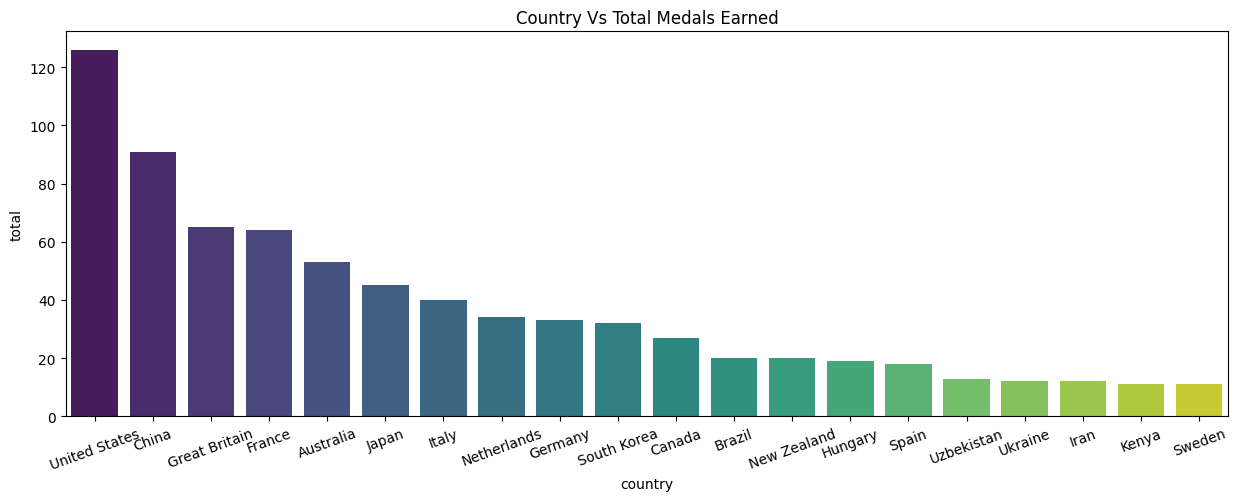

In [13]:
df = data.groupby("country").agg({"total":'sum'}).reset_index().sort_values(by='total',ascending=False)
plt.figure(figsize=(15,5))
plt.xticks(rotation=20)
plt.title("Country Vs Total Medals Earned")
sns.barplot(x='country', y='total', data=df.head(20), palette='viridis', hue='country', legend=False)

The above graph shows the top 20 countries according to the total medals earned.

Question 2: What is the distribution of gold, silver, and bronze medals across countries?

In [23]:
# Count the number of countries that won gold, silver, or bronze medals
gold = data['gold'] != 0
silver = data['silver'] != 0
bronze = data['bronze'] != 0

# get the distribution of countries
gold_count = gold.value_counts()
silver_count = silver.value_counts()
bronze_count = bronze.value_counts()

# Display the results
print("Gold Medal Distribution:")
print(gold_count)

print("\nSilver Medal Distribution:")
print(silver_count)

print("\nBronze Medal Distribution:")
print(bronze_count)

Gold Medal Distribution:
gold
True     63
False    27
Name: count, dtype: int64

Silver Medal Distribution:
silver
True     65
False    25
Name: count, dtype: int64

Bronze Medal Distribution:
bronze
True     77
False    13
Name: count, dtype: int64


`True` means the country won at least one gold, silver or bronze medal, and `False` means they won none.

**In summary:**

`63` countries won Gold medals

`65` countries won Silver medals

`77` countries won Bronze medals

# GDP and Medal Performance

Question 3: Is there a correlation between GDP and the total number of medals won?

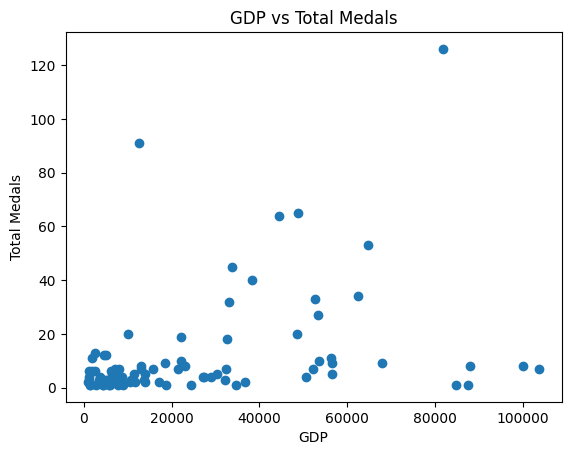

In [33]:
# plot a scatter plot
plt.scatter(data['gdp'], data['total'])
plt.xlabel('GDP')
plt.ylabel('Total Medals')
plt.title('GDP vs Total Medals')
plt.show()

Using `Pearson correlation` to measure the linear relationship between GDP and total medals. A correlation coefficient close to 1 means a strong positive relationship, while a coefficient close to -1 indicates a strong negative relationship. A coefficient near 0 means no linear relationship.

In [34]:
correlation = data['gdp'].corr(df['total'])
print(f"Correlation between GDP and total medals: {correlation}")

Correlation between GDP and total medals: 0.3146077481301402


This indicates a **weak positive correlation**. This suggests that while there is some relationship between GDP and the number of medals won, the correlation is not strong.

# Region Analysis

Question 4: How do different regions (Africa, Asia, Europe, etc.) compare in terms of medal counts?

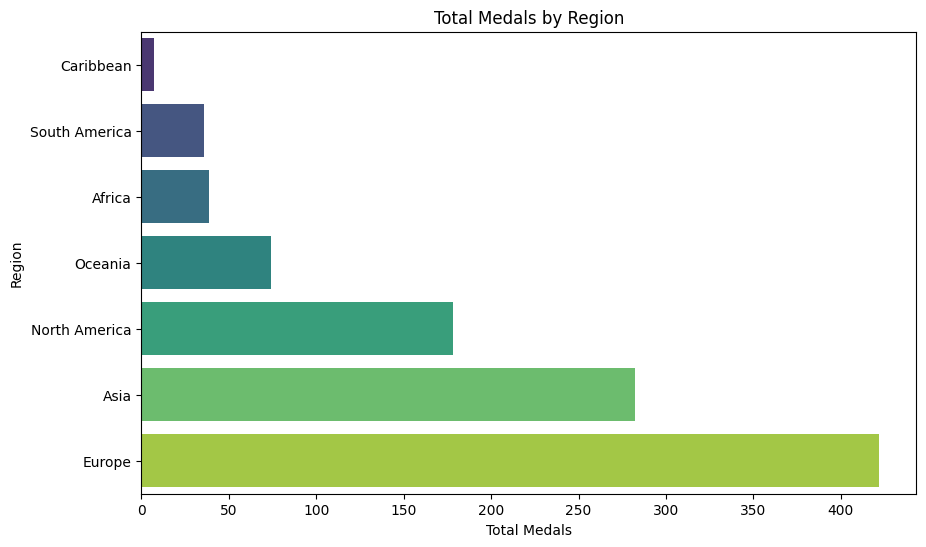

In [40]:
# Aggregate total medals by region
region_medal_counts = data.groupby('region')['total'].sum().sort_values()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=region_medal_counts.values, y=region_medal_counts.index, palette="viridis", hue=region_medal_counts.index, legend=False)
plt.xlabel('Total Medals')
plt.ylabel('Region')
plt.title('Total Medals by Region')
plt.show()

# Check for Collinearity in numerical columns

<Axes: >

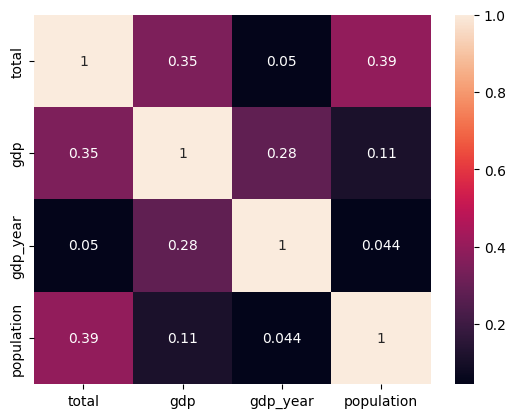

In [41]:
sns.heatmap(data[['total','gdp','gdp_year','population'] ].corr().abs(),annot=True)

We can observe that none of the features are tightly correlated.